# <span style = "color : Blue"> ***Titles:*** </span><a id = "titles"><a/>
1) ***[Pandas](#pandas)***    
2) ***[Numpy](#numpy)***   
3) ***[Matplotlib](#matplotlib)***        
4) ***[Matplotlib References](#matplotlib_references)***     
5) ***[Sandbox](#sandbox)*** 

In [1]:
def line(length = 5):
    str = ""
    for i in range(length):
        str += "#"
    print(str)

# <span style = "color : Red"> ***Pandas*** </span><a id = "pandas"></a>  
***([Return to Titles](#titles))***

In [2]:
import pandas as pd # pandas is already installed on Anaconda

In [3]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df = pd.DataFrame(data)
df

,calories,duration
0,420,50
1,380,40
2,390,45


In [4]:
print(df.loc[0])
line()
print(df.loc[[0, 2]])
line()
print(df.loc[0, "calories"])

calories    420
duration     50
Name: 0, dtype: int64
#####
   calories  duration
0       420        50
2       390        45
#####
420


In [5]:
df = pd.DataFrame(data, index = ["a", "b", "c"])
print(df)
line()
print(df.loc[["a", "c"]])

   calories  duration
a       420        50
b       380        40
c       390        45
#####
   calories  duration
a       420        50
c       390        45


In [6]:
df_csv = pd.read_csv("https://www.w3schools.com/python/pandas/data.csv.txt")
# df_json = pd.read_json("json_path")
print(df_csv.to_string()) 
# to_string() method from pandas converts whole DataFrame into a formed string

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
17         45     90       112       NaN
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45   

In [7]:
df_csv.head(10)
# df_csv.tail(10)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [8]:
print(df_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB
None


In [9]:
df_csv.dropna(inplace = True) 
# this method drops the rows with null values
# by default the dropna() method returns a new DataFrame and will not change the original (without inplace = True)
df_csv.fillna("W", inplace = True)
# this method replaces null values with "W"
df_csv["Calories"].fillna("W", inplace = True)
# this line applies fillna() only to the specified column

In [10]:
mean = df_csv.mean()
mode = df_csv.mode()
median = df_csv.median()

In [11]:
print(type(df_csv.index))
line()
print(df_csv.index)

<class 'pandas.core.indexes.numeric.Int64Index'>
#####
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            159, 160, 161, 162, 163, 164, 165, 166, 167, 168],
           dtype='int64', length=164)


In [12]:
# this cell replaces all rows with duration higher than 120 with the mean duration value
mean_duration = df_csv["Duration"].mean()
for i in df_csv.index:
    if df_csv.loc[i, "Duration"] > 120:
        print(df_csv.loc[i])        
        df_csv.loc[i, "Duration"] = mean_duration
        # df_csv.drop(i, "Duration")
        print(df_csv.loc[i])
        line()

Duration     210.0
Pulse        108.0
Maxpulse     160.0
Calories    1376.0
Name: 60, dtype: float64
Duration      64.146341
Pulse        108.000000
Maxpulse     160.000000
Calories    1376.000000
Name: 60, dtype: float64
#####
Duration     160.0
Pulse        110.0
Maxpulse     137.0
Calories    1034.4
Name: 61, dtype: float64
Duration      64.146341
Pulse        110.000000
Maxpulse     137.000000
Calories    1034.400000
Name: 61, dtype: float64
#####
Duration    160.0
Pulse       109.0
Maxpulse    135.0
Calories    853.0
Name: 62, dtype: float64
Duration     64.146341
Pulse       109.000000
Maxpulse    135.000000
Calories    853.000000
Name: 62, dtype: float64
#####
Duration    180.0
Pulse        90.0
Maxpulse    130.0
Calories    800.4
Name: 65, dtype: float64
Duration     64.146341
Pulse        90.000000
Maxpulse    130.000000
Calories    800.400000
Name: 65, dtype: float64
#####
Duration    150.0
Pulse       105.0
Maxpulse    135.0
Calories    873.4
Name: 66, dtype: float64
Duratio

In [13]:
print(df_csv.duplicated())
df_csv.drop_duplicates(inplace = True)

0      False
1      False
2      False
3      False
4      False
       ...  
164    False
165    False
166    False
167    False
168    False
Length: 164, dtype: bool


In [14]:
correlation = df_csv.corr()
correlation
# This method calculates the relationship between each column in your data set.
# This method ignores non-numeric values

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.293693,-0.165078,0.482893
Pulse,-0.293693,1.000000,0.784994,0.015301
Maxpulse,-0.165078,0.784994,1.000000,0.195309
Calories,0.482893,0.015301,0.195309,1.000000


In [15]:
import matplotlib.pyplot as plt # matplotlib.pyplot is already installed on Anaconda

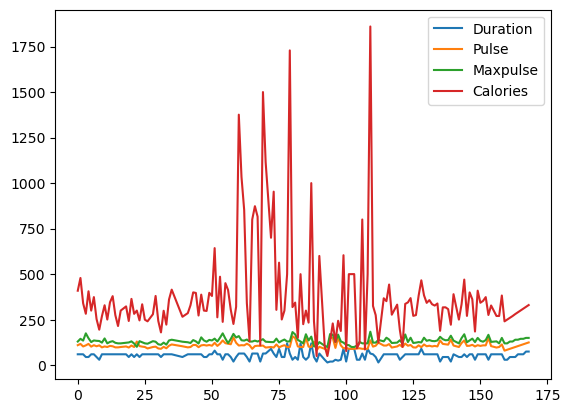

In [16]:
df_csv.plot()
plt.show()

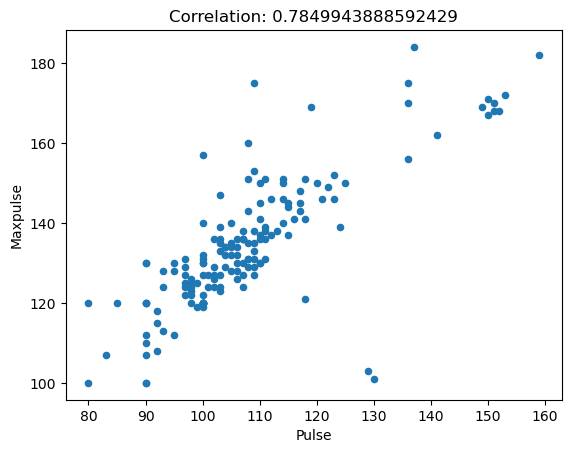

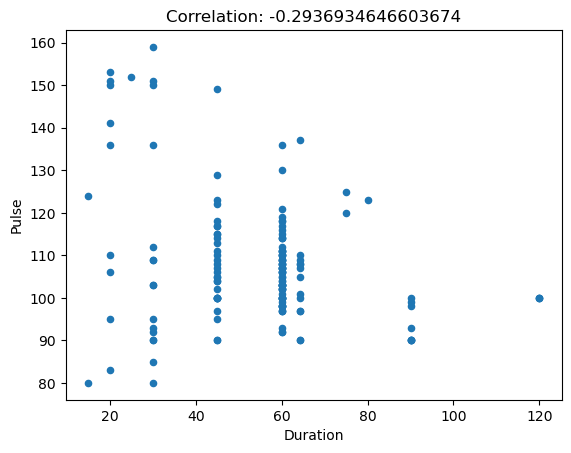

In [17]:
df_csv.plot(kind = "scatter", title = "Correlation: " + str(correlation.loc["Pulse", "Maxpulse"]), x = "Pulse", y = "Maxpulse") # good correlation
plt.show()

df_csv.plot(kind = "scatter", title = "Correlation: " + str(correlation.loc["Duration", "Pulse"]), x = "Duration", y = "Pulse") # bad correlation
plt.show()

<AxesSubplot:ylabel='Frequency'>

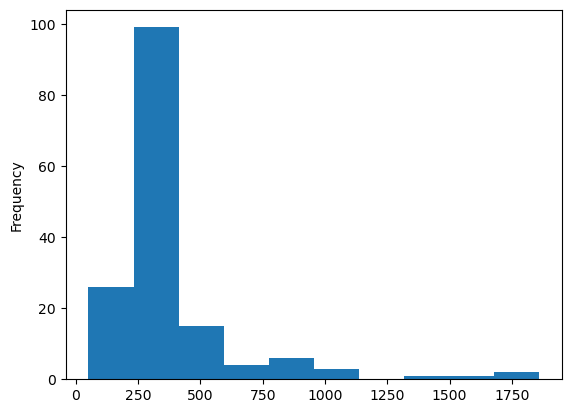

In [18]:
df_csv["Calories"].plot(kind = "hist")

# <span style = "color : Red"> ***Numpy*** </span><a id = "numpy"></a>
***([Return to Titles](#titles))***

In [19]:
import numpy as np # numpy is already installed on Anaconda

In [20]:
np_tuple = np.array((2, 4, 5, 8))
np_list = np.array(["a", "b", "c", "d"])
# numpy arrays CANNOT contain strings but they CAN contain chars
print(np_tuple)
print(np_list)

[2 4 5 8]
['a' 'b' 'c' 'd']


In [21]:
a = np.array(["m", "k", "l", "n"])
b = np.array([[5, 4, 6],["x", "y", "z"]])
print(a.ndim)
print(b.ndim)

1
2


In [22]:
a_appended = np.append(a, "o")
# numpy.append() method will return a new ndarray
# numpy.append() method DOESN'T MAKE changes to the original ndarray
print(a_appended)
# a = np.append(a, x) is an example of practical usage for numpy.append()

['m' 'k' 'l' 'n' 'o']


In [23]:
c = np.array(["w", "y", "x"], ndmin = 10)
print(c.ndim)

10


In [24]:
d = np.array([["a", "b", "c"], ["x", "y", "z"], ["k", "l", "o"]])
e = np.array([[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18]])
print(d[1, 2])
print(d[0, -2])
print(e[2, 2:-1:2])
print(e[:, -3])

z
b
[15 17]
[ 4 10 16]


In [25]:
f = np.array([1, "a", 3, 4], dtype = "c")
print(f.dtype)
print(type(f[0]))

|S1
<class 'numpy.bytes_'>


In [26]:
g = np.array(["a", "b", "c", "d", "e"])
g_copy = g.copy()
# The copy SHOULD NOT be affected by the changes made to the original array.
g_view = g.view()
# The view SHOULD be affected by the changes made to the original array.
# The original array SHOULD be affected by the changes made to the view.
print(g)
print(g_copy)
print(g_view)
line()
g[0] = 3
print(g)
print(g_copy)
print(g_view)
line()
g_view[1] = 5
print(g)
print(g_copy)
print(g_view)

['a' 'b' 'c' 'd' 'e']
['a' 'b' 'c' 'd' 'e']
['a' 'b' 'c' 'd' 'e']
#####
['3' 'b' 'c' 'd' 'e']
['a' 'b' 'c' 'd' 'e']
['3' 'b' 'c' 'd' 'e']
#####
['3' '5' 'c' 'd' 'e']
['a' 'b' 'c' 'd' 'e']
['3' '5' 'c' 'd' 'e']


In [27]:
h = np.array([[1, 2, 3, 4], ["a", "b", "c", "d"]])
print(h.shape)
i = np.array(["a", "b", "c", "d"], ndmin = 4)
print(i)
print(i.ndim)

(2, 4)
[[[['a' 'b' 'c' 'd']]]]
4


In [28]:
j = np.array([1, 2, 3, 4, 5, 6, 7, 8])
j_reshaped = j.reshape(4, 2)
# reshaped array should should have exactly the size enought to contain all elements
print(j_reshaped)
line()
j_reshaped_x = j.reshape(2, 2, -1)
# reshaping by -1 means unknown array shape, computer will automatically calculate the needed element size
print(j_reshaped_x)
line()
print(j_reshaped.reshape(-1))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
#####
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
#####
[1 2 3 4 5 6 7 8]


In [29]:
k = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
for a in k:
    for b in a:
        print(b)

0
1
2
3
4
5
6
7
8


In [30]:
for x in np.nditer(k):
    print(x)
line()
for x in np.nditer(k[:, ::2]):
    print(x)
line()
for index, x in np.ndenumerate(k):
    print(index, x)

0
1
2
3
4
5
6
7
8
#####
0
2
3
5
6
8
#####
(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8


In [31]:
k = np.array([[0, 1, 2], [3, 4, 5]])
l = np.array([["a", "b", "c"], ["d", "e", "f"]])
k_l_concatenate = np.concatenate((k, l), axis = 1) # axis = 0 as default (if not declared spesifically)
print(k_l_concatenate)
line()
k_l_stack = np.stack((k, l), axis = 1) # axis = 0 as default (if not declared spesifically)
print(k_l_stack)
line()
k_l_hstack = np.hstack((k, l))
print(k_l_hstack)
line()
k_l_vstack = np.vstack((k, l))
print(k_l_vstack)
line()
k_l_dstack = np.dstack((k, l))
print(k_l_dstack)

[['0' '1' '2' 'a' 'b' 'c']
 ['3' '4' '5' 'd' 'e' 'f']]
#####
[[['0' '1' '2']
  ['a' 'b' 'c']]

 [['3' '4' '5']
  ['d' 'e' 'f']]]
#####
[['0' '1' '2' 'a' 'b' 'c']
 ['3' '4' '5' 'd' 'e' 'f']]
#####
[['0' '1' '2']
 ['3' '4' '5']
 ['a' 'b' 'c']
 ['d' 'e' 'f']]
#####
[[['0' 'a']
  ['1' 'b']
  ['2' 'c']]

 [['3' 'd']
  ['4' 'e']
  ['5' 'f']]]


In [32]:
k = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
k_hsplit = np.hsplit(k, 4)
print(k_hsplit)
# np.vsplit(k, n)
# np.dsplit(k, n)

[array([[1],
       [5],
       [9]]), array([[ 2],
       [ 6],
       [10]]), array([[ 3],
       [ 7],
       [11]]), array([[ 4],
       [ 8],
       [12]])]


In [33]:
x = np.where(k == 5)
# locates where the target is inside the array
print(x)
line()
x = np.where(k > 6)
print(x)

(array([1], dtype=int64), array([0], dtype=int64))
#####
(array([1, 1, 2, 2, 2, 2], dtype=int64), array([2, 3, 0, 1, 2, 3], dtype=int64))


In [34]:
l = np.array([1, 2, 3, 4, 5, 6, 8, 15])
x = np.searchsorted(l, [-3, 7, 20, 4]) # side = "left" as default
# finds the possible index for the desired elements at the sorted array
# in order for this method to function properly, target array must be sorted and 1 demonsioned
print(x)

[0 6 8 3]


In [35]:
l = np.array([3, 2, 8, -5, 4])
l_sorted = np.sort(l)
print(l_sorted)
line()
l = np.array([["e", "i", "a"], ["d", "f", "b"]])
l_sorted = np.sort(l)
print(l_sorted)
line()
l = np.array([True, True, False, True, False])
l_sorted = np.sort(l)
print(l_sorted)

[-5  2  3  4  8]
#####
[['a' 'e' 'i']
 ['b' 'd' 'f']]
#####
[False False  True  True  True]


In [36]:
m = np.array(["a", "b", "c", "d", "e"])
boolean_index_list = [True, True, False, True, False]
# boolean index list must contain same number of elements with the array it will be applied on
print(m[boolean_index_list])
line()
m = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
boolean_index_list = [True, True, False],
print(m[boolean_index_list])
line()

['a' 'b' 'd']
#####
[[1 2 3]
 [4 5 6]]
#####


In [37]:
# this cell forms a boolean index list by appending True upon iterating over an even number and appending False otherwise
m = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]])
boolean_index_list = []
for x in m:
    for y in x:
        if (y % 2 == 0):
            boolean_index_list.append(True)
        else: 
            boolean_index_list.append(False)
m_flattened = m.reshape(-1)
m_applied = m_flattened[boolean_index_list]
print(m_applied)

[ 2  4  6  8 10 12 14]


In [38]:
# this cell does the exact same job with the upper cell, but instead of looping through the ndarray, boolean index list is created directly from the ndarray itself
boolean_index_list = m_flattened % 2 == 0
m_applied = m_flattened[boolean_index_list]
print(m_applied)

[ 2  4  6  8 10 12 14]


In [39]:
from numpy import random as rnd

In [40]:
x = rnd.randint(100)
# this method generates a random integer from 0 to 100
print(x)
line()
x = rnd.rand()
# this method generates a random float from 0.0 to 1.0
print(x)
line()
x = rnd.randint(30, size = 5)
# this method generates 5 random integers from 0 to 30 and outputs them as a ndarray
print(x)
print(type(x))
line()
x = rnd.randint(30, size = (3, 5))
# this method generates 15 random integers from 0 to 30 and outputs them as a 5 columned 3 rowed ndarray
print(x)
line()
x = rnd.choice(["a", "b", "c", "d", "e", "f", "g"], size = (3, 4))
# choice() method takes a list as a parameter and outputs random elements from the input array accordingly to the input size
print(x)
line()
x = rnd.choice(["a", "b", "c", "d"], p = [0.5, 0.0, 0.3, 0.2], size = (5, 5))
# p parameter inside the choice() method respectively specifies the distribution probability of the elements
# p paramater's list must be the same size with the element pool array and obviously the elements of p's list must sum up to 1.0
print(x)

54
#####
0.4578872208646956
#####
[14  3  3 26 13]
<class 'numpy.ndarray'>
#####
[[21 20 15 29  2]
 [ 3 11  9  4 21]
 [18 10  7  5  2]]
#####
[['f' 'd' 'g' 'e']
 ['b' 'c' 'd' 'b']
 ['c' 'c' 'g' 'c']]
#####
[['d' 'a' 'c' 'd' 'c']
 ['d' 'c' 'a' 'a' 'c']
 ['d' 'a' 'd' 'c' 'a']
 ['c' 'a' 'c' 'c' 'a']
 ['a' 'a' 'a' 'c' 'c']]


In [41]:
cards = np.array(["A", "K", "Q", "J", 10, 9, 8, 7, 6, 5, 4, 3, 2])
rnd.shuffle(cards)
# shuffle() method MAKES changes to the original array
print(cards)
line()
cards_permutated = rnd.permutation(cards)
# permutation() method DOESN'T MAKE changes to the original array
print(cards)
print(cards_permutated)

['3' 'J' 'A' '9' 'Q' '5' '7' '2' '4' '6' '8' '10' 'K']
#####
['3' 'J' 'A' '9' 'Q' '5' '7' '2' '4' '6' '8' '10' 'K']
['9' 'K' '8' '10' '5' '2' '7' 'J' 'Q' '3' 'A' '6' '4']


# <span style = "color : Red"> ***Matplotlib*** </span><a id = "matplotlib"></a>
***([Return to Titles](#titles))***

In [42]:
import matplotlib # matplotlib is already installed on Anaconda
import matplotlib.pyplot as plt

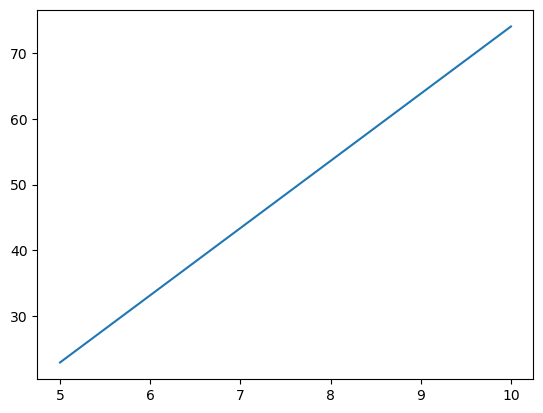

In [43]:
x = np.array([5, 10])
y = np.array([23, 74])
plt.plot(x, y)
# plot() method plots a line accordingly by default
# x and y parameters inside the plot() function must have the same rank 
# if not declared as a parameter, x and y values are taken as 1, 2, 3, ... n accordingly
plt.show()

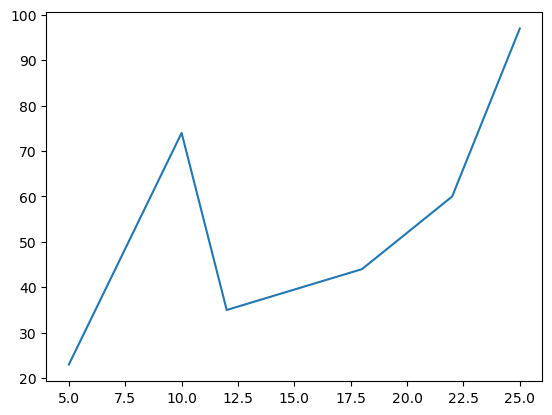

In [44]:
x = np.array([5, 10, 12, 18, 22, 25])
y = np.array([23, 74, 35, 44, 60, 97])
plt.plot(x, y)
plt.show()

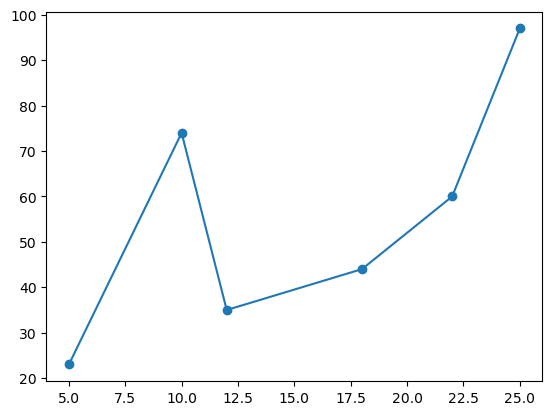

In [45]:
plt.plot(x, y, marker = "o")
plt.show()

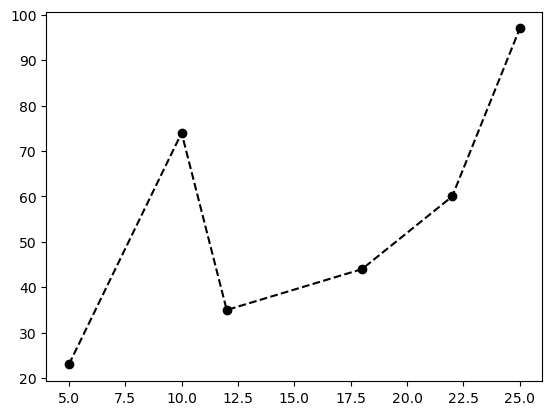

In [46]:
plt.plot(x, y, "o--k")
# shortcut string notation parameter (fmt) allows to shortcut usage of design properties
# fmt parameter has the syntax of "marker|line|color" respectiveley
plt.show()

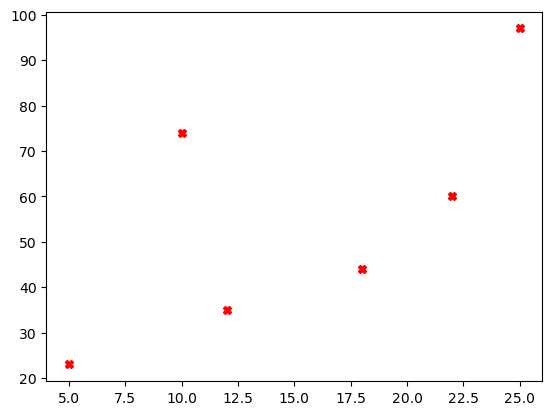

In [47]:
plt.plot(x, y, "Xr")
# fmt shortcut will only show the markers and color because line property is not defined
plt.show()

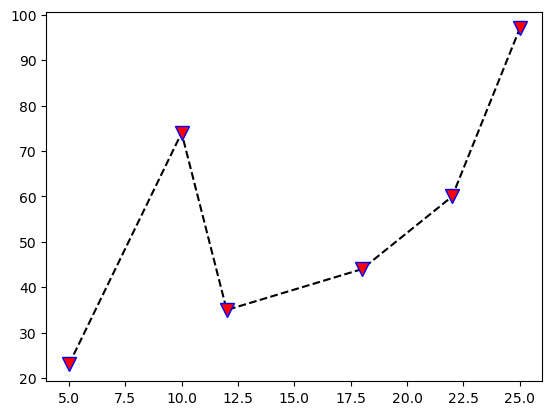

In [48]:
plt.plot(x, y, "v--k", ms = 10, mec = "b", mfc = "r")
# ms, mec and mfc parameters refer to "markersize", "markeredgecolor" and "markerfacecolor", respectively
# hexadecimal values can also be used for color parameters
plt.show()

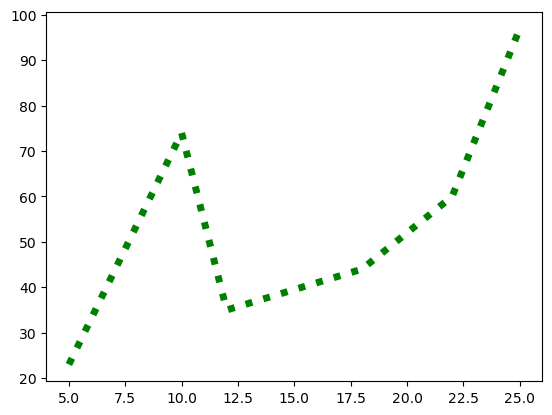

In [49]:
plt.plot(x, y, ls = ":", linewidth = "5", c = "g")
# ls and c parameters refer to "linestyle" and "color", respectively
plt.show()

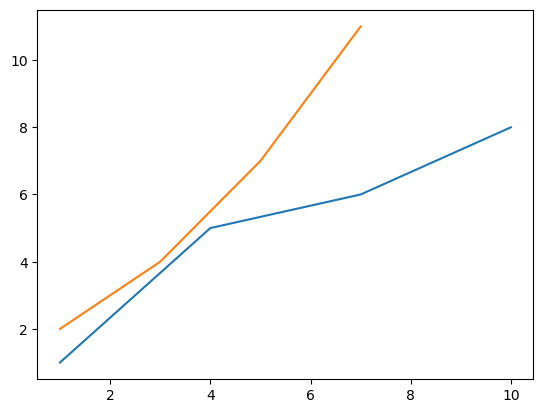

In [50]:
x1 = np.array([1, 4, 7, 10])
y1 = np.array([1, 5, 6, 8])
x2 = np.array([1, 3, 5, 7])
y2 = np.array([2, 4, 7, 11])
plt.plot(x1, y1, x2, y2)
# more than 1 lines can be plotted by the order of x-axis_1, y-axis_1, x-axis_2, y-axis_2, ... x-axis_n, y-axis_n
plt.show()

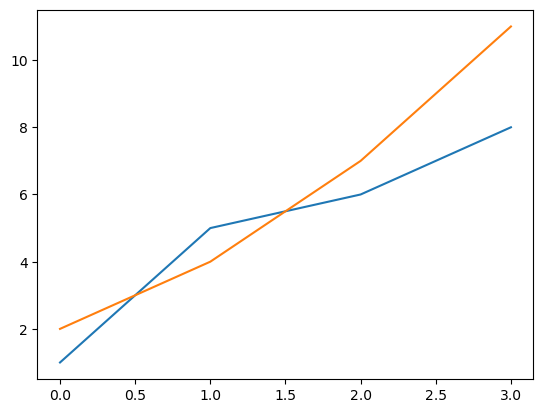

In [51]:
plt.plot(y1)
plt.plot(y2)
# when single parameter is taken, plot() method will read the input as y-axis values for single line
plt.show()

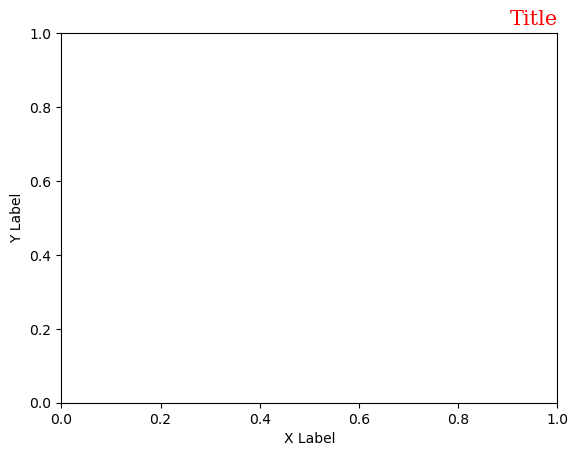

In [52]:
font_title = {"family":"serif", "color":"red", "size":15}
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.title("Title", fontdict = font_title, loc = "right")
# fontdict parameter enables the user to use more design properties for labels and titles
# loc parameter can take arguments "left", "right" or "center"
# loc parameter is "center" by default
plt.show()

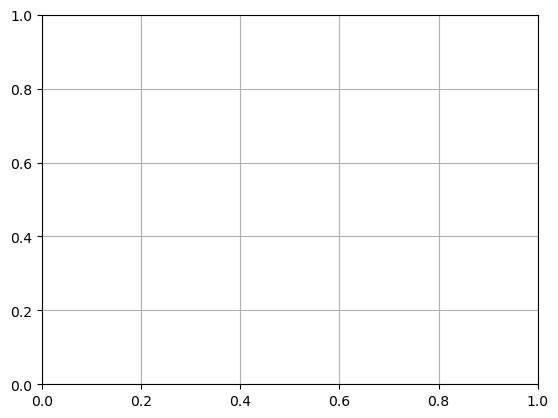

In [53]:
plt.grid()
# plt.grid(axis = "y"/"x") will show only y-axis/x-axis lines inside the grid, respectively
plt.show()

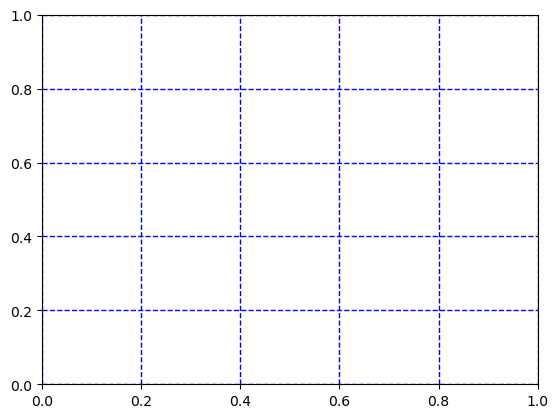

In [54]:
plt.grid(c = "b", ls = "--", linewidth = 1)
plt.show()

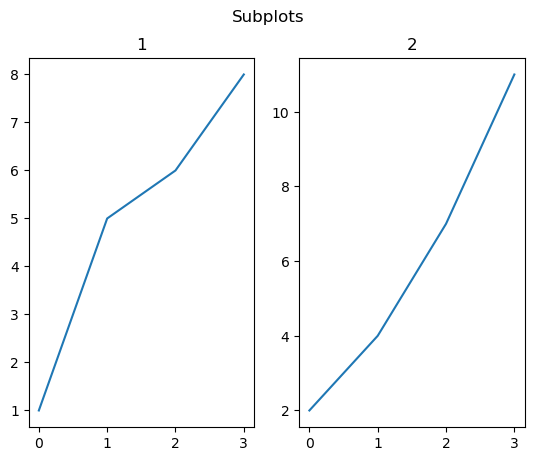

In [55]:
plt.suptitle("Subplots")
# suptitle refers to the "Super Title"
plt.subplot(1, 2, 1)
# subplot() takes three arguements, first and second numbers indicates the shape of the graph array, last number indicates the index of the current graph
plt.title("1")
# normal title refers to the current graph's title
plt.plot(y1)
plt.subplot(1, 2, 2)
plt.title("2")
plt.plot(y2)
plt.show()

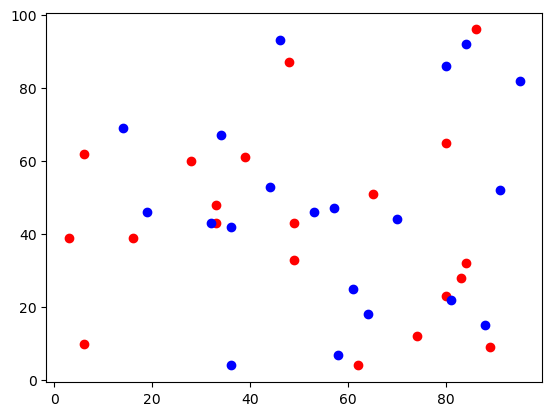

In [56]:
x1 = rnd.randint(100, size = 20)
y1 = rnd.randint(100, size = 20)
plt.scatter(x1, y1, color = "r")
# scatter() takes two parameters as values for dots on the graph, these two parameters must have same number of elemenets
x2 = rnd.randint(100, size = 20)
y2 = rnd.randint(100, size = 20)
plt.scatter(x2, y2, color = "b")
# by using scatter() multiple times, without using show() method, more than one scatter graphs can be plotted on the same graph
plt.show()

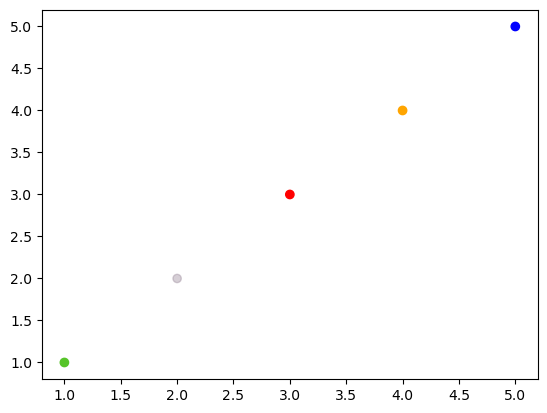

In [57]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
colors = np.array(["#56c429", "#9896", "red", "orange", "blue"])
plt.scatter(x, y, c = colors)
# the c parameter CANNOT be changed with color parameter for this kind of usage
# c parameter takes a color list which MUST be the same size with the data lists 
# hexadecimal values CAN be used but color shortcuts CANNOT be used for c parameter
plt.show()

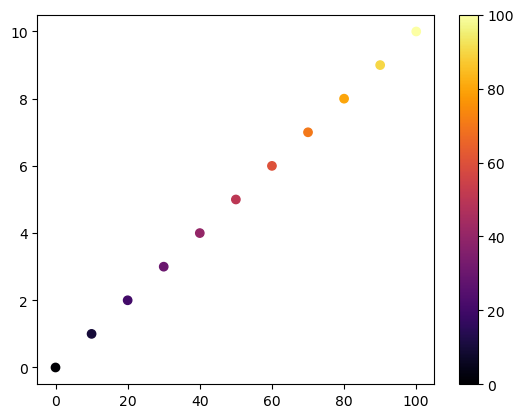

In [58]:
x = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
colors = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.scatter(x, y, c = colors, cmap = "inferno")
# cmap parameter refers to "colormap"
# if c parameter takes a number list instead of colors, then scatter graph will automatically use a colormap
# cmap parameter is "viridis" by default
plt.colorbar()
plt.show()

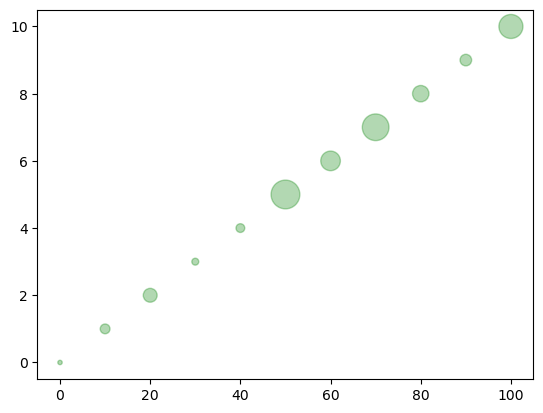

In [59]:
sizes = np.array([10, 50, 100, 25, 40, 430, 200, 370, 140, 70, 300])
plt.scatter(x, y, s = sizes, alpha = 0.3, color = "g")
# s parameter refers to "size" and takes a list of sizes
# s paramter's sizes list must also be the same size with the data lists
# alpha parameter manages the dots' alpha value
# alpha parameter MUST be a float value between 0 and 1 
plt.show()

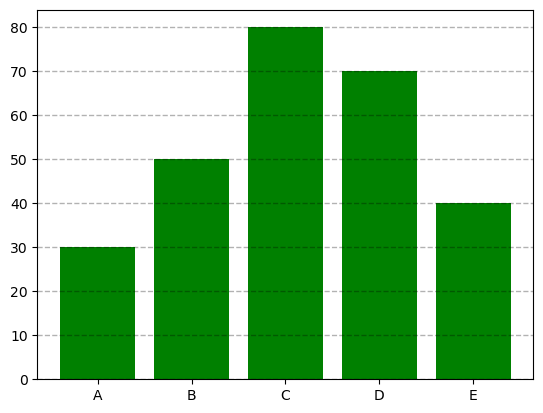

In [60]:
x = np.array(["A", "B", "C", "D", "E"])
y = np.array([30, 50, 80, 70, 40])
plt.bar(x, y, color = "g")
# bar() method plots a bar graph
# c parameter CANNOT be used in bar() method, instead color parameter is used
plt.grid(axis = "y", ls = "--", c = "k", linewidth = 1, alpha = 0.3)
plt.show()

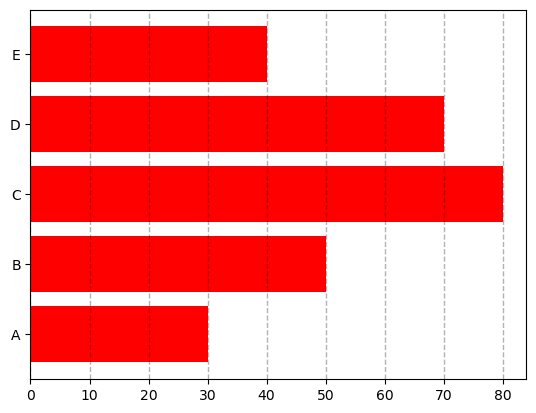

In [61]:
plt.barh(x, y, color = "r")
# barh() method creates horizontally displayed bars
plt.grid(axis = "x", ls = "--", c = "k", linewidth = 1, alpha = 0.3)
plt.show()

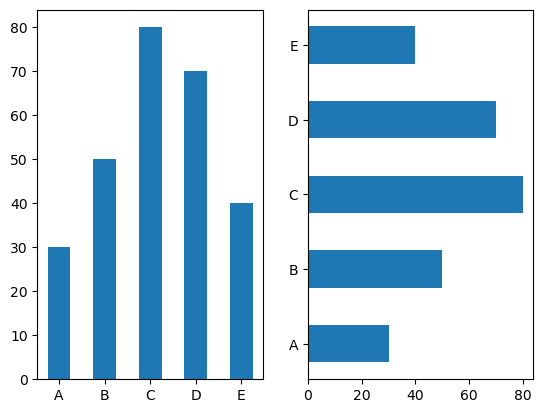

In [62]:
plt.subplot(1, 2, 1)
plt.bar(x, y, width = 0.5)
# with width parameter bar widths can be adjusted
# width parameter is 0.8 by default
plt.subplot(1, 2, 2)
plt.barh(x, y, height = 0.5)
# for barh() height parameter is used instead of width
plt.show()

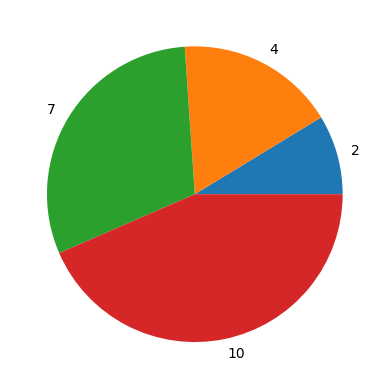

In [63]:
x = np.array([2, 4, 7, 10])
labels = np.array(["2", "4", "7", "10"])
plt.pie(x, labels = labels)
# pie() method takes a number list as a parameter and creates a pie chart accordingly to the numerical relationship between the elements
plt.show()

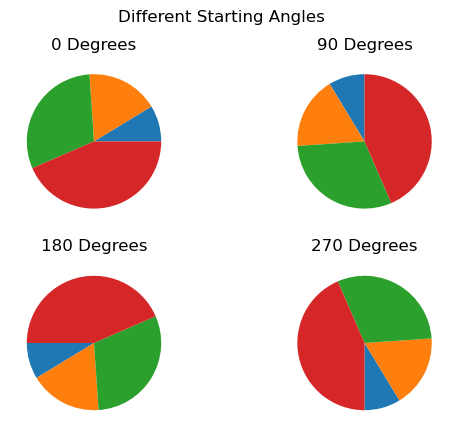

In [64]:
plt.subplot(2, 2, 1)
plt.pie(x)
plt.title("0 Degrees")
plt.subplot(2, 2, 2)
plt.pie(x, startangle = 90)
plt.title("90 Degrees")
plt.subplot(2, 2, 3)
plt.pie(x, startangle = 180)
plt.title("180 Degrees")
plt.subplot(2, 2, 4)
plt.pie(x, startangle = 270)
plt.title("270 Degrees")
plt.suptitle("Different Starting Angles")
plt.show()

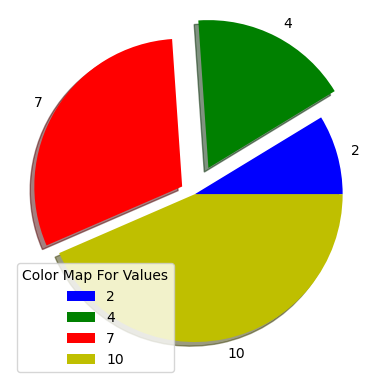

In [65]:
explode = [0, 0.2, 0.1, 0]
colors = ["b", "g", "r", "y"]
plt.pie(x, explode = explode, shadow = True, colors = colors, labels = labels)
# explode parameter MUST be the same size with the elements list
plt.legend(title = "Color Map For Values", loc = "lower left")
# in order for legend() method to be used, pie() method MUST take a list for labels parameter
plt.show()

# <span style = "color : Orange"> ***Matplotlib References*** </span><a id = "matplotlib_references"></a>
***([Return to Titles](#titles))***
 
***Marker Reference:***  
"o" : Circle       
"*" : Star   	
"." : Point   	
"," : Pixel   
"x" : X	
"X" : X (filled)	
"+" : Plus	
"P" : Plus (filled)	
"s" : Square	
"D" : Diamond	
"d" : Diamond (thin)	
"p" : Pentagon	
"H" : Hexagon	
"h" : Hexagon	
"v" : Triangle Down	
"^" : Triangle Up	
"<" : Triangle Left	
">" : Triangle Right	
"1" : Tri Down	
"2" : Tri Up	
"3" : Tri Left	
"4" : Tri Right	
"|" : Vline	
"_" : Hline <br>

***Line Reference:***    
"-" : Solid Line  
":" : Dotted Line  
"--" : Dashed Line	
"-." : Dashed/Dotted Line

***Color Reference:***    
"r" : Red  
"g" : Green  
"b" : Blue  
"c" : Cyan  
"m" : Magenta  
"y" : Yellow  
"k" : Black  
"w" : White  

***Colormap Reference:***  
**Note:** In order to get a reverse colormap, use **"colormapName_r"**           
"Accent" 		 		
"Blues"		 		
"BrBG"		 		
"BuGn"		 		
"BuPu"		 		
"CMRmap"		 		
"Dark2"		 		
"GnBu"		 		
"Greens"		 		
"Greys"		 		
"OrRd"		 		
"Oranges"		 		
"PRGn"		 		
"Paired"		 		
"Pastel1"		 		
"Pastel2"		 		
"PiYG"		 		
"PuBu"		 		
"PuBuGn"		 		
"PuOr"		 		
"PuRd"		 		
"Purples"		 		
"RdBu"		 		
"RdGy"		 		
"RdPu"		 		
"RdYlBu"		 		
"RdYlGn"		 		
"Reds"		 		
"Set1"		 		
"Set2"		 		
"Set3"		 		
"Spectral"		 		
"Wistia"		 		
"YlGn"		 		
"YlGnBu"		 		
"YlOrBr"		 		
"YlOrRd"		 		
"afmhot"		 		
"autumn"		 		
"binary"		 		
"bone"		 		
"brg"		 		
"bwr"		 		
"cividis"		 		
"cool"		 		
"coolwarm"		 		
"copper"		 		
"cubehelix"		 		
"flag"		 		
"gist_earth"		 		
"gist_gray"		 		
"gist_heat"		 		
"gist_ncar"		 		
"gist_rainbow"		 		
"gist_stern"	 		
"gist_yarg"		 		
"gnuplot"		 		
"gnuplot2"		 		
"gray"		 		
"hot"		 		
"hsv"		 		
"inferno"		 		
"jet"		 		
"magma"		 		
"nipy_spectral"  
"ocean"		 		
"pink"		 		
"plasma"		 		
"prism"		 		
"rainbow"		 		
"seismic"		 		
"spring"		 		
"tab10"		 		
"tab20"		 		
"tab20b"		 		
"tab20c"	 		
"terrain"		 		
"twilight"		 	
"twilight_shifted"		 	
"viridis"		 		
"winter"		 	

# <span style = "color : Green"> ***Sandbox*** </span><a id = "sandbox"></a>
***([Return to Titles](#titles))***

In [ ]:
print("test commit")